# New York Movies Scene


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Film_Permits.csv',skipinitialspace = True)
df = pd.DataFrame(df)
df.dropna(inplace=True)

In [3]:
# set date time format
df["StartDateTime"] = pd.to_datetime(df["StartDateTime"])
df["EndDateTime"] = pd.to_datetime(df["EndDateTime"])
df["EnteredOn"] = pd.to_datetime(df["EnteredOn"])

In [4]:
#clean CommunityBoard and PolicePrecinct
def setMean(columns):
    mean = []
    for cell in df[columns]:
    #     cell to string
        getCell = str(cell)
        #   if the first character is not a number remove it
        if getCell[0].isnumeric() == False:
            getCell = getCell[1:]
    #     cell to numpy array seperated by comma
        seperateCell = np.array(np.fromstring(getCell, dtype=int, sep=','))
    #     appaned mean
        mean.append(int(np.mean(seperateCell)))
    return mean

# clean Zipcodes
def setZip(code):
    postCode = []
    for zipcode in df['ZipCode(s)']:
        getZip = str(zipcode)
        # check if , is in the string
        if "," in getZip:
            # slicing off after length computation
            res = getZip[:getZip.index(',') + len(',') -1]
            postCode.append(int(res))
        else:
            postCode.append(int(getZip))
    return postCode

In [5]:
movie_scene = df
# remove spaces
movie_scene['CommunityBoard(s)'] = movie_scene['CommunityBoard(s)'].str.replace(' ','')
movie_scene['PolicePrecinct(s)'] = movie_scene['PolicePrecinct(s)'].str.replace(' ','')
# convert muitple CommunityBoard & PolicePrecinct to mean and set coloumn values as mean
movie_scene['CommunityBoard(s)'] =  setMean('CommunityBoard(s)')
movie_scene['PolicePrecinct(s)'] = setMean('PolicePrecinct(s)')
# convert multiple zipcodes to one zip code and replace zip code coloumn
movie_scene['ZipCode(s)'] = setZip('ZipCode(s)')
movie_scene.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,446040,Shooting Permit,2018-10-19 14:00:00,2018-10-20 04:00:00,2018-10-16 11:57:27,"Mayor's Office of Film, Theatre & Broadcasting",THOMPSON STREET between PRINCE STREET and SPRI...,Manhattan,2,1,Television,Cable-episodic,United States of America,10012
1,446168,Shooting Permit,2018-10-19 14:00:00,2018-10-20 02:00:00,2018-10-16 19:03:56,"Mayor's Office of Film, Theatre & Broadcasting",MARBLE HILL AVENUE between WEST 227 STREET an...,Manhattan,10,42,Film,Feature,United States of America,10034
2,186438,Shooting Permit,2014-10-30 07:00:00,2014-10-31 02:00:00,2014-10-27 12:14:15,"Mayor's Office of Film, Theatre & Broadcasting",LAUREL HILL BLVD between REVIEW AVENUE and RUS...,Queens,3,106,Television,Episodic series,United States of America,11378
3,445255,Shooting Permit,2018-10-20 07:00:00,2018-10-20 18:00:00,2018-10-09 21:34:58,"Mayor's Office of Film, Theatre & Broadcasting",JORALEMON STREET between BOERUM PLACE and COUR...,Brooklyn,2,84,Still Photography,Not Applicable,United States of America,11201
4,128794,Theater Load in and Load Outs,2013-11-16 00:01:00,2013-11-17 06:00:00,2013-11-07 15:48:28,"Mayor's Office of Film, Theatre & Broadcasting",WEST 31 STREET between 7 AVENUE and 8 AVENUE...,Manhattan,4,14,Theater,Theater,United States of America,10001


In [6]:
# group by StartDateTime
month = pd.DataFrame(movie_scene.groupby(pd.to_datetime(movie_scene['StartDateTime'])))
# get month name 
month = pd.DataFrame(month.groupby(month[0].dt.month_name()))
# get months only
month = pd.DataFrame(month[0])

In [19]:
# pre covid numbers
# covid start date in the usa 
start_date = pd.to_datetime('1/1/2020')
# get movies where Category == Film
monthlyFilm = movie_scene.where(movie_scene['Category'] == 'Film').dropna()
# set date constraints
monthlyFilm.loc[(monthlyFilm['StartDateTime'] < start_date)]
# cound by month name
monthlyFilm = pd.DataFrame(monthlyFilm.groupby(pd.to_datetime(monthlyFilm['StartDateTime']).dt.month_name())['Category'].count())
monthlyFilm.describe()

,Category
count,12.000000
mean,964.083333
std,309.219974
min,360.000000
25%,736.000000
50%,1032.000000
75%,1204.500000
max,1310.000000


In [20]:
# get covid numbers 
# set dates 
start_date = pd.to_datetime('1/1/2020')
end_date = pd.Timestamp.today()
# get only films
monthlyCovidFilm = movie_scene.where(movie_scene['Category'] == 'Film').dropna()
# set date constraints
monthlyCovidFilm = monthlyCovidFilm.loc[(monthlyCovidFilm['StartDateTime'] > start_date) & (monthlyCovidFilm['StartDateTime'] <= end_date)]
# 
monthlyCovidFilm = pd.DataFrame(monthlyCovidFilm.groupby(pd.to_datetime(monthlyCovidFilm['StartDateTime']).dt.month_name())['Category'].count())
monthlyCovidFilm.describe()

,Category
count,12.000000
mean,66.250000
std,43.302582
min,19.000000
25%,39.500000
50%,47.000000
75%,102.250000
max,142.000000


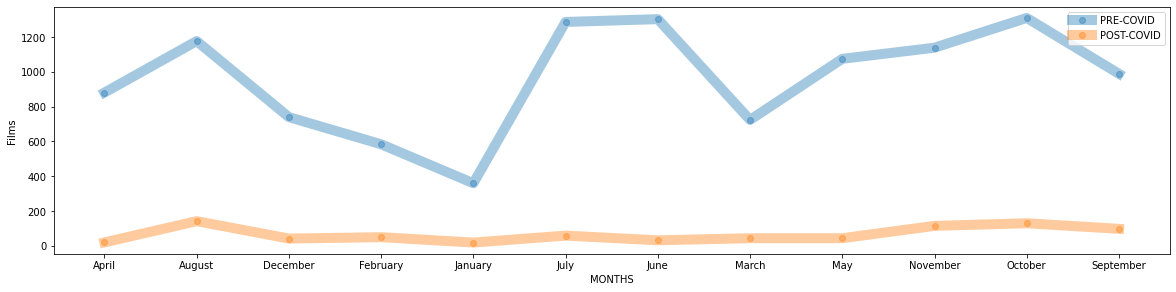

In [14]:
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(211)

preCovid = plt.plot_date(month[0], monthlyFilm, linestyle='solid', alpha=0.4, linewidth=10,label="PRE-COVID")
postCovid = plt.plot_date(month[0], monthlyCovidFilm, linestyle='solid', alpha=0.4, linewidth=10, label='POST-COVID')

leg = plt.legend(loc='upper right')
plt.xlabel('MONTHS')
plt.ylabel('Films')
plt.show()

In [32]:
crimeDescription = movie_scene['Category'].unique()
crimeDescription

array(['Television', 'Film', 'Still Photography', 'Theater', 'WEB',
       'Commercial', 'Student', 'Documentary', 'Music Video',
       'Red Carpet/Premiere'], dtype=object)

In [ ]:
def duration(categoryName):
    for cell in movie_scene[categoryName]:
        